In [1]:
import numpy as np
def f(x):
    return 5*(x-3)

def fp(x):
    return 5

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
for x in [-1,3,4]: 
    print(f(x), fp(x))

-20 5
0 5
5 5


In [3]:
def bisection(f, a, b):
    c = (a + b)/2
    if f(a)*f(c)<= 0:
        an = a
        bn = c
    else: 
        an = c
        bn = b
    return an, bn # updated values

In [4]:
print(bisection(f,0,4)) 
print(bisection(f,3,4))

(2.0, 4)
(3, 3.5)


In [5]:
def newton(f,fp,x): 
    xn = x - f(x)/fp(x)
    return xn # updated value

In [6]:
for x in [-100,5,1000]: 
    print(newton(f,fp,x))

3.0
3.0
3.0


In [7]:
def secant(f,xnm1,xn):
    xnp1 = xn - f(xn) * (xn - xnm1) / (f(xn)-f(xnm1))
    return xn,xnp1

In [8]:
print(secant(f,0,4)) 
print(secant(f,5,3))

(4, 3.0)
(3, 3.0)


In [9]:
#define g(x) and gp(x)

def g(x):
    return (x-1)*(x-4)
def gp(x):
    return 2*x - 5 

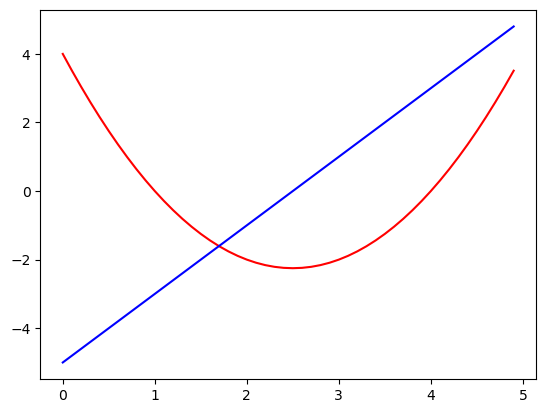

In [24]:
%matplotlib inline
#from matplotlib import pylab as plt
#plt.ion()
x = np.arange(0,5,.1)
plt.plot(x,g(x),'-r')
plt.plot(x,gp(x),'-b')
plt.show()

In [25]:
a,b = 0,2.5
for n in range(10):
    a,b = bisection(g, a, b)
    print(a,b)

0 1.25
0.625 1.25
0.9375 1.25
0.9375 1.09375
0.9375 1.015625
0.9765625 1.015625
0.99609375 1.015625
0.99609375 1.005859375
0.99609375 1.0009765625
0.99853515625 1.0009765625


In [26]:
a,b = 0,2.5
for n in range(10):
    a,b = secant(g, a, b)
    print(a,b)

2.5 1.6
1.6 -2.220446049250313e-16
-2.220446049250313e-16 1.1764705882352942
1.1764705882352942 1.0461538461538462
1.0461538461538462 0.9970674486803519
0.9970674486803519 1.0000457756687062
1.0000457756687062 1.000000044703483
1.000000044703483 0.9999999999993179
0.9999999999993179 1.0
1.0 1.0


In [27]:
#newton
# 8.8 

a,b = 0,2.49
for n in range(10):
    b = newton(g, gp, b)
    print(b)

-110.0050000000024
-53.762499555576504
-25.65124533448919
-11.61558537534624
-4.637491826609638
-1.2263643074591677
0.3349149974941825
0.8978474147559538
0.9967433967375671
0.9999964725035014


/var/folders/nn/cm43qfrs2q1cwxq88l_40zj40000gn/T/ipykernel_35228/1770122838.py:4: RuntimeWarning: invalid value encountered in sqrt
  u = np.sqrt(v0**2 -v**2)


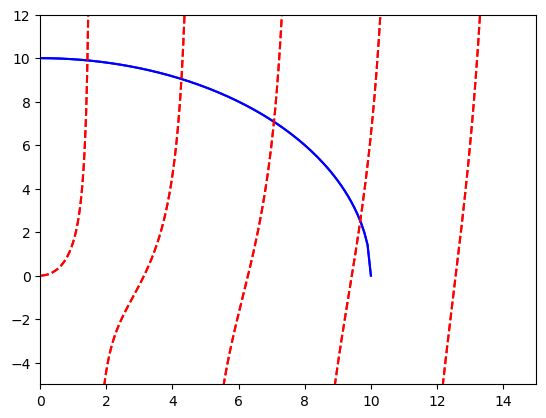

(-5.0, 12.0)

In [29]:
#v0 = np.sqrt(m * L**2 V0/2*hbar)
v0=10
def fun(v):
    u = np.sqrt(v0**2 -v**2)
    return u

def tan(v):
    return v * np.tan(v)

v = np.arange(0,14,.1)
plt.plot(v,fun(v),'-b')

for n in range(0,5):
    v1 = np.arange(-np.pi/2 + n*np.pi,np.pi/2 + n*np.pi,.01)
#    print(v1/np.pi)
    plt.plot(v1[1:-1],tan(v1[1:-1]),'--r')

plt.show()
plt.xlim(0,15)
plt.ylim(-5,12)

In [15]:
def h(v,v0=10.):
    return v * np.tan(v) - np.sqrt(v0**2- v**2)

def h(v,v0=10.):
    return v * np.tan(v) - np.sqrt(v0**2- v**2)

for v in [1,1.5,2,4.5]: 
    print(np.around(h(v),2))

-8.39
11.27
-14.17
11.94


In [16]:
v1 = np.arange(0,10,.01)
a = [1,3,6,8.5]
b = [1.5,4.5,7.5,10]
plt.clf()
#plt.plot(v1,h(v1),'-r')
plt.ylim(-10,10)
print(np.pi/2.)
for n in range(0,4):
    v1 = np.arange(a[n],b[n],.02)
    plt.plot(v1[1:-1],h(v1)[1:-1],'-r')
#    #print(v1[1:-1])

1.5707963267948966


In [17]:
for n in np.arange(0,4):
    a0 =a[n]
    b0 = b[n]
    for m in range(7):
        a0,b0 = secant(h, a0, b0)
    print(a0,b0)

1.532080242834843 1.3334272122832913
4.320379185155875 4.257824360611053
7.068908807786106 7.068891216781006
9.678884018488306 9.678884018488255


In [18]:
def hp(v,v0=10.):
    return np.tan(v) + v * 1/np.cos(v)**2 - np.sqrt(v0**2- v**2)

for n in np.arange(0,4):
    a0 =a[n]
    for m in range(7):
        a0 = newton(h,hp,a0)
    print(a0)

-1.427557974752312
1.4275533068664488
-1.4275508933433447
9.643300422281818


In [19]:
# 8.8 
def trapz(f,a,b,n):
    h = (b-a)/(n-1)
    i=0
    xi = a+h*i
    x=[]
    while xi < b:
        x.append(xi)
        i=i+1
        xi = a+h*i
    x = np.arange(a+h,b,h)
    print(h)
    It = h/2*(f(a)+f(b)) + np.sum(np.abs(h*f(x)))
    return It

print(np.around(trapz(np.sin,0.,np.pi/2,2),2))
print(np.around(trapz(np.sin,0.,np.pi/2,3),2)) 
print(np.around(trapz(np.sin,0.,np.pi/2,4),2))

1.5707963267948966
0.79
0.7853981633974483
0.95
0.5235987755982988
1.5
